Importing Modules


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import datetime

importing database

In [2]:
df = pd.read_csv("/content/Google_Stock_Price_Train.csv", index_col="Date", parse_dates=True)

In [3]:
df.head()
# df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


# New Section

In [4]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [5]:
df.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


Plotting graph


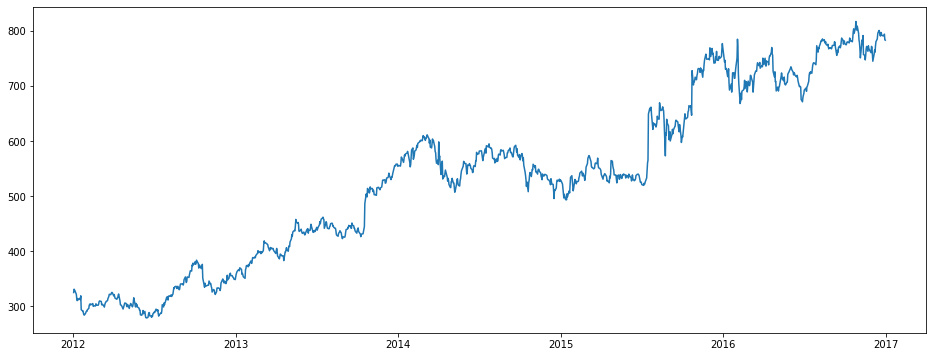

In [7]:
plt.figure(figsize=[16,6])
x = df["Open"]
plt.plot(x)

Homogenize the datset

In [8]:
df["Close"] = df["Close"].str.replace(',', '').astype(float)
df["Volume"] = df["Volume"].str.replace(',', '').astype(float)

In [9]:
df.describe()

,Open,High,Low,Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,533.709833,537.880223,529.007409,712.669666,3.158107e+06
std,151.904442,153.008811,150.552807,164.752591,2.273726e+06
min,279.120000,281.210000,277.220000,491.200000,7.900000e+03
25%,404.115000,406.765000,401.765000,576.740000,1.621700e+06
50%,537.470000,540.750000,532.990000,695.675000,2.566150e+06
75%,654.922500,662.587500,644.800000,782.105000,4.122500e+06
max,816.680000,816.680000,805.140000,1216.830000,2.497790e+07


7 days rolling mean

In [10]:
# df.rolling().mean().head(15)

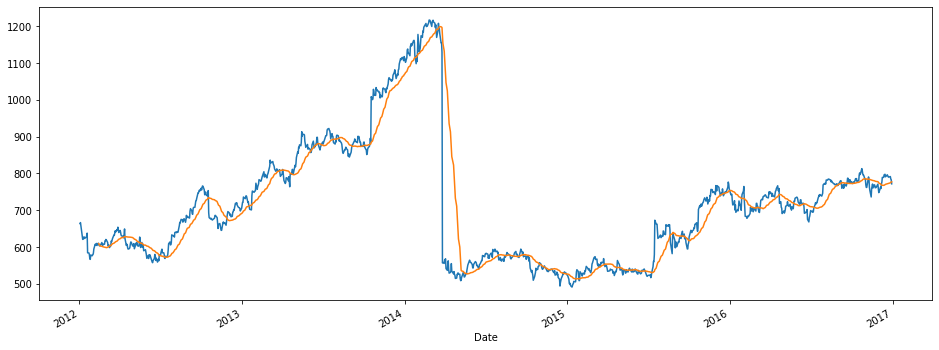

In [11]:
df["Close"].plot(figsize=(16,6))
# 30 days rollling mean
df.rolling(30).mean()["Close"].plot()

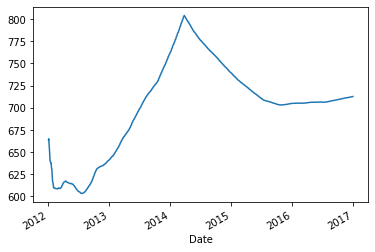

In [12]:
df["Close"].expanding(min_periods=1).mean().plot() 

## Traning Dataset

In [13]:
train = df["Open"]
train = pd.DataFrame(train)

Data Preprocessing

In [14]:
# Feature Scaling of data using minmax scaler
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range = (0,1))
train_scale = scale.fit_transform(train)

In [15]:
x_train = []
y_train = []
for i in range(60, 1258):
  x_train.append(train_scale[i-60:i,0])
  y_train.append(train_scale[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

# # Reshaping x_train
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [16]:
x_train.shape

(1198, 60, 1)

Feature Extraction

In [17]:
# importing keras libs
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [18]:
# Initialize RNN
regressor = Sequential()

## Training Neural Network

In [19]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [20]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0376
Epoch 2/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0058
Epoch 3/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0050
Epoch 4/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0049
Epoch 5/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0054
Epoch 6/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0044
Epoch 7/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0054
Epoch 8/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0047
Epoch 9/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0041
Epoch 10/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0044
Epoch 11/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0048
Epoch 12/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0042
Epoch 13/100
38/38 [=====

# Prediction Analysis


In [21]:
df_test = pd.read_csv('/content/Google_Stock_Price_Test.csv',index_col="Date",parse_dates=True)

In [22]:
df_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


In [23]:
test = df_test['Open']
test = pd.DataFrame(test)

In [24]:
# Getting the predicted stock price of 2017
df_total = pd.concat((df['Open'], df_test['Open']), axis = 0)

In [25]:
inputs = df_total[len(df_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scale.transform(inputs)

In [26]:
inputs.shape

(80, 1)

In [27]:
x_test = []
for i in range(60, 80):
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [28]:
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = scale.inverse_transform(predicted_stock_price)
predicted_stock_price=pd.DataFrame(predicted_stock_price)

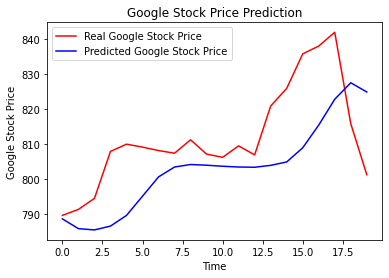

In [29]:
# plotting
real_stock_price = df_test.iloc[:, 1:2].values
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [36]:
predicted_stock_price = np.array(predicted_stock_price, dtype=float)
predicted_stock_price

array([[788.62384033],
       [785.83441162],
       [785.47253418],
       [786.56488037],
       [789.61437988],
       [795.11297607],
       [800.61657715],
       [803.44445801],
       [804.15893555],
       [803.96026611],
       [803.66259766],
       [803.44586182],
       [803.3760376 ],
       [803.91912842],
       [804.89025879],
       [808.93145752],
       [815.4262085 ],
       [822.80773926],
       [827.51599121],
       [824.88146973]])

In [32]:
real_stock_price

array([[789.63],
       [791.34],
       [794.48],
       [807.9 ],
       [809.97],
       [809.13],
       [808.15],
       [807.39],
       [811.22],
       [807.14],
       [806.21],
       [809.48],
       [806.91],
       [820.87],
       [825.9 ],
       [835.77],
       [838.  ],
       [841.95],
       [815.84],
       [801.25]])

In [37]:
a = (real_stock_price - predicted_stock_price)**2
a

array([[  1.01235728],
       [ 30.3115034 ],
       [ 81.1344405 ],
       [455.18732958],
       [414.35127036],
       [196.47695974],
       [ 56.75245986],
       [ 15.56730161],
       [ 49.85863121],
       [ 10.11070759],
       [  6.4892587 ],
       [ 36.41082362],
       [ 12.48889026],
       [287.33204739],
       [441.40922575],
       [720.30736248],
       [509.57606286],
       [366.42614632],
       [136.32877076],
       [558.44636144]])

In [40]:
(a.sum()**0.5)/20

3.311335799455177

In [42]:
acc = ((a.sum())**0.5)//20
print("RMSE is " + str(acc))

RMSE is 3.0
